In [ ]:
https://blog.keras.io/building-autoencoders-in-keras.html

In [1]:
# Import
import keras
import numpy as np
from keras.datasets import mnist
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
# Getting Dataset:
def get_dataset():
    (X, Y), (X_test, Y_test) = mnist.load_data()
    
    X = X.astype('float32') / 255.
    X_test = X_test.astype('float32') / 255.
    X = np.reshape(X, (len(X), 28, 28, 1))
    X_test = np.reshape(X_test, (len(X_test), 28, 28, 1))
    
    # Add noise:
    noise_factor = 0.4
    X_train_noisy = X + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X.shape) 
    X_test_noisy = X_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_test.shape) 

    X_train_noisy = np.clip(X_train_noisy, 0., 1.)
    X_test_noisy = np.clip(X_test_noisy, 0., 1.)
    
    return X, X_test, Y, Y_test, X_train_noisy, X_test_noisy

X, X_test, Y, Y_test, X_train_noisy, X_test_noisy = get_dataset()

DISPLAYING IMAGES WITH NOISE AND WITHOUT NOISE

Training shape: (60000, 28, 28, 1)
60000 sample, 28 x 28 size grayscale image.

Test shape: (10000, 28, 28, 1)
10000 sample, 28 x 28 size grayscale image.

Examples:


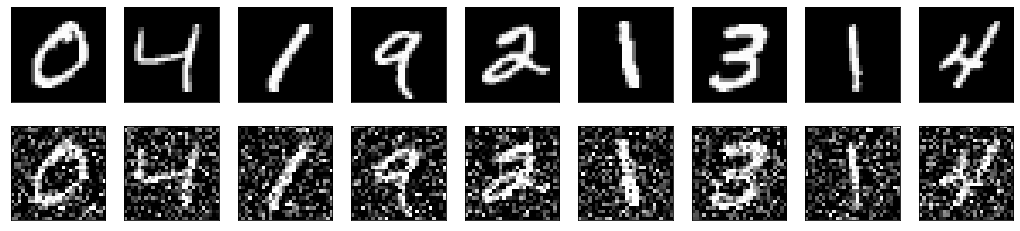

In [3]:
# About Dataset:
print('Training shape:', X.shape)
print(X.shape[0], 'sample,',X.shape[1] ,'x',X.shape[2] ,'size grayscale image.\n')
print('Test shape:', X_test.shape)
print(X_test.shape[0], 'sample,',X_test.shape[1] ,'x',X_test.shape[2] ,'size grayscale image.\n')

print('Examples:')
n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n):
    # display original
    ax = plt.subplot(2, n, i)
    plt.imshow(X[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(X_train_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

In [4]:
# Deep Learning Model:
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, Dense
from keras.models import Model

input_img = Input(shape=(28, 28, 1))

x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)   #PADDING SAME BECAUSE EDGES ALSO IMPORTANT TO PREVENT LOSS OF EDGE DATA
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)
# Output Shape: 4x4x8

x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)
# Output Shape: 28x28x1

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

autoencoder.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 8)           584       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 8)           0   

In [5]:
# Checkpoints:
from keras.callbacks import ModelCheckpoint, TensorBoard
checkpoints = []

In [10]:
epochs = 5
batch_size = 100
autoencoder.fit(X_train_noisy, X, batch_size=batch_size, epochs=epochs, validation_data=(X_test_noisy, X_test), shuffle=True, callbacks=checkpoints)

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 72s 1ms/step - loss: 0.1415 - val_loss: 0.1401
Epoch 2/5
60000/60000 [==============================] - 125s 2ms/step - loss: 0.1365 - val_loss: 0.1340
Epoch 3/5
60000/60000 [==============================] - 156s 3ms/step - loss: 0.1328 - val_loss: 0.1301
Epoch 4/5
60000/60000 [==============================] - 158s 3ms/step - loss: 0.1302 - val_loss: 0.1286
Epoch 5/5
60000/60000 [==============================] - 153s 3ms/step - loss: 0.1279 - val_loss: 0.1272


In [11]:
decoded_imgs = autoencoder.predict(X_test_noisy)

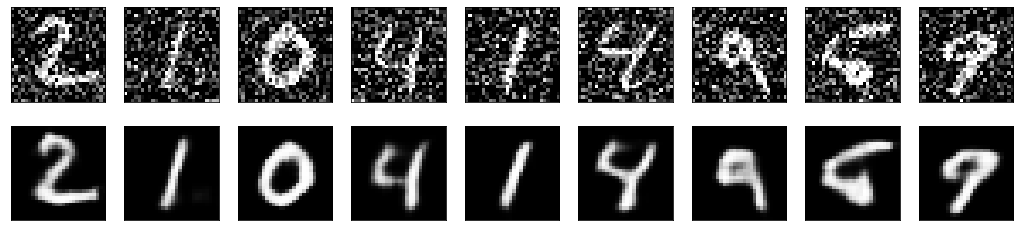

In [12]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n):
    # display original
    ax = plt.subplot(2, n, i)
    plt.imshow(X_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)